# Хід роботи

In [137]:
from pycaret.datasets import get_data
dataset = get_data('kiva')

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


Після виконання цього коду PyCaret завантажить датасет "kiva" і відобразить перші кілька рядків у вигляді таблиці. Датасет автоматично зберігається як pandas DataFrame, який ми будемо використовувати для подальшого аналізу.

In [138]:
dataset.country.unique(), dataset.gender.unique(), dataset.nonpayment.unique(), dataset.sector.unique(), dataset.status.unique()

(array(['Dominican Republic', 'Ecuador', 'Kenya'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['partner', 'lender'], dtype=object),
 array(['Retail', 'Clothing', 'Food', 'Services', 'Arts', 'Agriculture',
        'Wholesale', 'Manufacturing', 'Transportation', 'Health',
        'Education', 'Personal Use', 'Construction', 'Housing',
        'Entertainment'], dtype=object),
 array([0, 1], dtype=int64))

### Опис ознак датасету "kiva"
Щоб зрозуміти фізичний сенс даних, я дослідив опис ознак датасету "kiva" на основі інформації з документації PyCaret та інших джерел. Ось опис усіх ознак:
1. country: Країна позичальника 'Dominican Republic', 'Ecuador', 'Kenya'
2. en: Особиста історія позичальника 
3. gender: Стать позичальника (M = чоловік, F = жінка)
4. loan_amount: Сума кредиту, яка була схвалена та виплачена (числова величина)
5. nonpayment: Тип кредитора 'partner', 'lender'
6. sector: Сектор діяльності позичальника (наприклад, 'Retail', 
        'Clothing', 'Food', 'Services', 'Arts', 'Agriculture',
        'Wholesale', 'Manufacturing', 'Transportation', 'Health',
        'Education', 'Personal Use', 'Construction', 'Housing',
        'Entertainment')
7. status: Статус кредиту (1 = дефолт, тобто не повернуто, 0 = повернуто)


Цей датасет містить 6818 записів і пов’язаний із діяльністю Kiva Microfunds — некомерційної організації, що дозволяє людям надавати кредити підприємцям із низьким доходом по всьому світу. Опис буде додано до ноутбука для зрозумілості.

## Вибір типу завдання

Для визначення актуального завдання (регресія, класифікація чи кластеризація) я проаналізував структуру датасету. Оскільки в датасеті є колонка status, яка є бінарною змінною (1 = дефолт, 0 = повернуто), це вказує на задачу класифікації: передбачити, чи буде кредит повернуто, на основі інших ознак.

Для простоти я спочатку ігноруватиму текстову ознаку en, оскільки її обробка потребує додаткових методів обробки природної мови (NLP), які не є обов’язковими для базового аналізу.

Отже, я обираю задачу класифікації та імпортую відповідний модуль:

In [139]:
from pycaret.classification import *

## Аналіз даних та збереження результатів

На цьому етапі я проводжу аналіз даних (EDA — Exploratory Data Analysis), налаштовую експеримент у PyCaret, порівнюю моделі, налаштовую найкращу модель, оцінюю її за метриками та зберігаю результати в ноутбуці.

Розмір датасету: (6818, 7)

Перші рядки:
               country                                                 en  \
0  Dominican Republic  "Banco Esperanza" is a group of 10 women looki...   
1  Dominican Republic  "Caminemos Hacia Adelante" or "Walking Forward...   
2  Dominican Republic  "Creciendo Por La Union" is a group of 10 peop...   
3  Dominican Republic  "Cristo Vive" ("Christ lives" is a group of 10...   
4  Dominican Republic  "Cristo Vive" is a large group of 35 people, 2...   

  gender  loan_amount nonpayment    sector  status  
0      F         1225    partner    Retail       0  
1      F         1975     lender  Clothing       0  
2      F         2175    partner  Clothing       0  
3      F         1425    partner  Clothing       0  
4      F         4025    partner      Food       0  

Типи даних:
 country        object
en             object
gender         object
loan_amount     int64
nonpayment     object
sector         object
status          int64
dtype: object



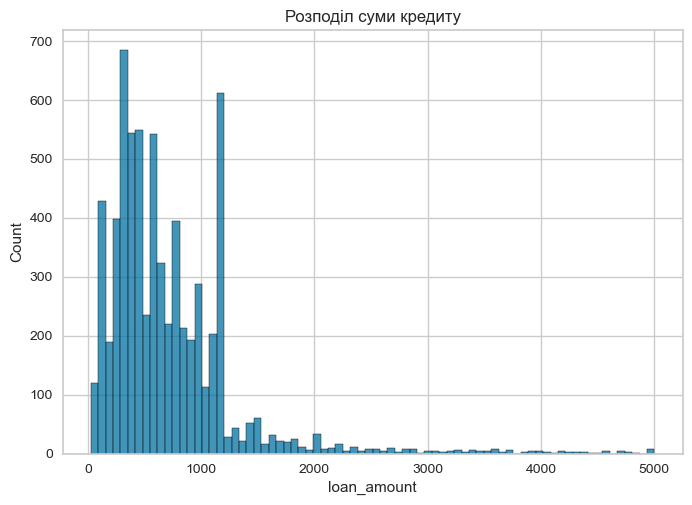

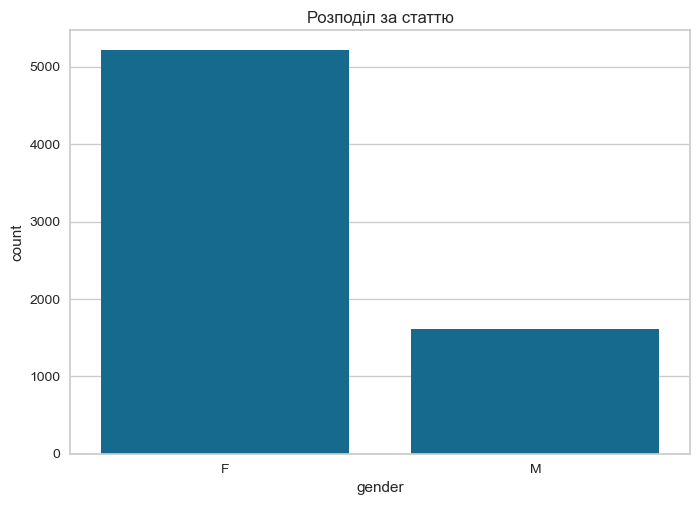


Рівень дефолту за статтю:
 gender
F    0.482057
M    0.531425
Name: status, dtype: float64


In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Перегляд розміру датасету
print("Розмір датасету:", dataset.shape)
# Перегляд перших кількох рядків
print("\nПерші рядки:\n", dataset.head())
# Типи даних
print("\nТипи даних:\n", dataset.dtypes)
# Перевірка пропущених значень
print("\nПропущені значення:\n", dataset.isnull().sum())
# Розподіл цільової змінної 'status'
print("\nРозподіл статусу кредиту:\n", dataset['status'].value_counts())

# Візуалізація розподілу суми кредиту
sns.histplot(dataset['loan_amount'])
plt.title('Розподіл суми кредиту')
plt.show()

# Візуалізація розподілу за статтю
sns.countplot(x='gender', data=dataset)
plt.title('Розподіл за статтю')
plt.show()

# Середній рівень дефолту за статтю
print("\nРівень дефолту за статтю:\n", dataset.groupby('gender')['status'].mean())

### Налаштування експерименту

In [141]:
clf = setup(data=dataset, target='status', ignore_features=['en'], session_id=123)

,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(6818, 7)"
4,Transformed data shape,"(6818, 22)"
5,Transformed train set shape,"(4772, 22)"
6,Transformed test set shape,"(2046, 22)"
7,Ignore features,1
8,Numeric features,1
9,Categorical features,4


target='status': Цільова змінна — статус кредиту.
ignore_features=['en']: Ігноруємо текстову ознаку для спрощення.
session_id=123: Забезпечує відтворюваність результатів.

Після запуску setup() PyCaret виведе таблицю з інформацією про датасет: кількість зразків, ознак, типи даних, пропущені значення тощо. Якщо класи незбалансовані, можна додати fix_imbalance=True.



### Порівняння моделей

In [142]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8959,0.9580,0.8175,0.9665,0.8856,0.7913,0.8008,0.0360
lightgbm,Light Gradient Boosting Machine,0.8952,0.9597,0.8493,0.9326,0.8889,0.7902,0.7934,0.0600
dt,Decision Tree Classifier,0.8847,0.9138,0.8472,0.9132,0.8789,0.7692,0.7713,0.0110
rf,Random Forest Classifier,0.8824,0.9453,0.8548,0.9021,0.8777,0.7647,0.7659,0.0440
et,Extra Trees Classifier,0.8822,0.9236,0.8468,0.9085,0.8765,0.7642,0.7660,0.0390
ada,Ada Boost Classifier,0.8669,0.9192,0.8459,0.8807,0.8626,0.7337,0.7349,0.0250
lr,Logistic Regression,0.8653,0.9121,0.8459,0.8777,0.8611,0.7303,0.7315,0.0380
ridge,Ridge Classifier,0.8594,0.9117,0.8459,0.8668,0.8559,0.7186,0.7194,0.0120
lda,Linear Discriminant Analysis,0.8592,0.9118,0.8459,0.8664,0.8557,0.7182,0.7190,0.0110
knn,K Neighbors Classifier,0.8516,0.9195,0.8540,0.8474,0.8504,0.7032,0.7038,0.0200


Ця функція тренує кілька моделей (наприклад, логістичну регресію, дерева рішень, випадковий ліс тощо) і виводить таблицю з метриками: Accuracy, AUC, Recall, Precision, F1-score, Kappa, MCC. Найкраща модель обирається за замовчуванням за Accuracy.

### Налаштування найкращої моделі
PyCaret оптимізує гіперпараметри моделі для підвищення продуктивності.

In [143]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8787,0.9523,0.7881,0.9588,0.8651,0.7567,0.7688
1,0.9017,0.9517,0.8390,0.9565,0.8939,0.8030,0.8090
2,0.8889,0.9501,0.8170,0.9505,0.8787,0.7773,0.7849
3,0.8910,0.9542,0.8298,0.9420,0.8824,0.7815,0.7870
4,0.9078,0.9601,0.8468,0.9614,0.9005,0.8152,0.8209
5,0.8994,0.9591,0.8383,0.9517,0.8914,0.7984,0.8039
6,0.8973,0.9582,0.8220,0.9652,0.8879,0.7942,0.8029
7,0.8889,0.9648,0.8347,0.9336,0.8814,0.7775,0.7818
8,0.8973,0.9689,0.8475,0.9390,0.8909,0.7943,0.7980


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Оцінка моделі
Ця команда відкриває інтерактивний інтерфейс із графіками: Confusion Matrix, ROC-крива (AUC), важливість ознак тощо. 


In [144]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Фіналізація моделі

Модель тренується на всіх даних для підготовки до збереження.

In [145]:
final_model = finalize_model(tuned_model)

## Збереження моделі



In [146]:
save_model(final_model, 'kiva_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['loan_amount'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['country', 'gender', 'nonpayme...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                